In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# with help from http://planspace.org/20150423-forward_selection_with_statsmodels/
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response, ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < (best_new_score * 1):
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    
    model = smf.ols(formula, data).fit()
    return (model, formula)

In [3]:
response=pd.read_pickle('data/ZipcodeMVPSnew.pkl')[['RegionName','2000_agg','2010_agg']]
response=response.rename(columns={'RegionName': 'zipcode'})
response['2010_agg_adj'] = response['2010_agg']/1.26
response['pct_delta'] = (response['2010_agg_adj']/response['2000_agg']) - 1
response = response.drop(['2010_agg','2000_agg', '2010_agg_adj'], 1)

## Testing a few different response variables:
### - house price delta (above)
### - house/rental ratio delta (below)
### - house/rental ratio 2015 (below)

In [4]:
ratio_response = pd.read_pickle('data/housing_rental_ratio.pkl')
ratio_response = ratio_response.rename(columns = {'RegionName': 'zipcode'})

ratio_delta_response = ratio_response[['zipcode','ratio_pct_delta']]
ratio_2015_response = ratio_response[['zipcode','ratio_2015']]

ratio_delta_response['zipcode'] = ratio_delta_response['zipcode'].astype('str')
ratio_2015_response['zipcode'] = ratio_2015_response['zipcode'].astype('str')

/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
ratio_delta_response.head(3)

,zipcode,ratio_pct_delta
0,11368,0.984804
1,79936,1.001354
2,60629,1.073514


In [6]:
ratio_2015_response.head(3)

,zipcode,ratio_2015
0,11368,197.083754
1,79936,108.096860
2,60629,96.111037


In [7]:
response.head(3)

,zipcode,pct_delta
1,79936,0.173843
2,60629,0.085907
3,90650,0.426587


In [8]:
# training and test sets that were normalized, and training and test sets that were normalized and transformed ('_t')
train_set = pd.read_pickle('data/train_all_features_norm.pkl')
itrain_df = pd.DataFrame(train_set.index).rename(columns={0: 'ind'})

train_set_t = pd.read_pickle('data/train_all_features_norm_and_transform.pkl')
itrain_t_df = pd.DataFrame(train_set_t.index).rename(columns={0: 'ind'})

test_set = pd.read_pickle('data/test_all_features_norm.pkl')
itest_df = pd.DataFrame(test_set.index).rename(columns={0: 'ind'})

test_set_t = pd.read_pickle('data/test_all_features_norm_and_transform.pkl')
itest_t_df = pd.DataFrame(test_set_t.index).rename(columns={0: 'ind'})

features = pd.concat([train_set, test_set])
features_t = pd.concat([train_set_t, test_set_t])

print features.shape, train_set.shape, test_set.shape
features.head(10)

(27653, 64) (22122, 64) (5531, 64)


,zipcode,prison,jail,A001,A002,A003,A004,A005,A006,A007,A008,A009,A010,A011,A012,A013,A014,A015,A016,A017,A018,A019,A020,A021,A022,A023,A024,A025,A026,A027,A028,A029,A030,A031,A032,A033,A034,A035,A036,A037,A038,A039,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,median_income
0,01001,0,0,0.393159,-0.844788,-0.576017,-0.174118,-0.117701,0.107539,-0.016376,0.170177,0.302420,1.862902,-0.661973,-0.790923,-0.635659,-0.198994,-0.050199,-0.043662,-0.090009,-0.044475,-0.020593,1.102067,0.725830,-0.772259,-0.455802,-0.057597,-0.171337,0.315046,0.117725,0.383984,0.672488,2.097870,0.537700,-0.396109,-0.176487,-0.012918,-0.132979,-0.367899,-0.890846,-0.317130,-0.457076,-0.174062,-0.299229,1.122282,0.268374,0.452518,1.600822,1.382658,-0.747222,0.588576,0.758788,-0.797671,-0.140852,-0.530444,-0.652569,-0.228583,0.486598,-1.127662,0.459736,0.742016,0.244980,0.334447,0.334018
1,01002,0,0,1.245532,-1.599994,1.060064,3.597249,-1.353027,-2.046088,-1.219645,-0.868623,-0.806043,-0.218702,-0.400512,-1.502592,0.492105,2.820575,-1.110719,-1.885773,-1.384025,-0.915197,-0.790664,-0.376806,0.464421,-1.508369,1.426019,3.888342,-1.261798,-1.604638,-0.859521,-0.715226,-0.731682,-0.143021,-0.223040,-0.195494,-0.162262,1.524147,-0.132979,-0.065958,-1.612656,-1.106050,-0.983398,-0.122170,0.166579,0.116185,-0.327456,-0.507041,0.520319,0.090974,-0.843631,-0.630502,0.751994,-0.790133,-0.264675,-0.530444,-0.166848,-0.330651,0.973388,-0.031431,0.763299,1.633192,0.335312,0.417431,0.110293
3,01005,0,0,-0.418261,-0.321953,0.815872,-0.337381,-0.276076,0.681839,0.556609,-0.311218,-0.667485,0.078670,0.165987,-0.298230,1.099363,-0.272642,-0.387638,0.416865,0.479358,0.001353,-0.469801,-0.202821,-0.101965,-0.262645,0.416261,-0.352621,-0.107192,0.778418,0.552056,-0.565334,-0.865412,0.193112,0.667700,-0.433724,-0.176487,-0.316536,-0.132979,-0.466359,0.196325,0.156222,0.244687,-0.139468,-0.066325,-0.223221,-0.142543,0.185974,-0.233994,0.090974,0.291852,-0.171839,0.602543,-0.624302,-0.471047,0.240861,0.226354,0.230722,-0.461362,-0.442518,-0.416119,-0.399458,-0.271116,-0.314831,0.984848
4,01007,0,0,0.246007,0.171836,0.254233,-0.435338,0.008999,1.327927,0.757154,-0.361891,-0.736764,-0.553246,-0.247993,0.194464,0.231852,-0.346290,-0.194816,0.704695,0.582879,-0.365267,-0.790664,-0.463799,0.311932,0.133722,0.232669,-0.463255,0.341821,1.572770,0.823513,-0.365477,-0.664817,-0.535177,0.547330,-0.421186,-0.190712,-0.012918,-0.003289,-0.413847,0.321082,-0.685293,-0.457076,-0.104873,0.195692,-0.502019,-0.656190,-0.507041,-0.172834,-0.339587,0.538230,-0.835693,0.779167,-0.820284,-0.677419,-0.221922,0.249484,0.154171,0.191188,-0.481669,-0.062791,-0.286955,-0.233152,-0.263373,1.043897
6,01009,0,0,-0.719368,-0.496231,-0.087635,0.201386,0.832550,0.574158,-0.102324,-0.108525,-1.256356,0.487556,0.492813,-0.133999,0.492105,0.169246,0.962115,-0.043662,-0.245291,0.230490,-0.983182,0.145149,-0.428727,-0.828883,-0.685293,0.200548,0.341821,1.043202,0.009142,-0.365477,-1.333469,0.585268,0.658071,-0.477609,-0.190712,-0.335512,-0.132979,-0.453231,-0.561130,-0.001562,-0.457076,0.759997,0.894404,0.528321,0.658746,-0.027262,0.234903,0.029466,-0.286602,-0.618432,0.548198,-0.564000,-0.388498,-0.838966,-0.375014,-0.177549,-0.754192,-0.227187,-0.617665,-0.509473,-0.307238,-0.358285,-0.233389
9,01012,0,0,-0.724921,-1.193344,-0.160892,-0.435338,-0.592827,0.466476,1.817176,0.727583,-0.563567,0.190184,0.144198,-1.283617,0.058350,-0.125346,-0.725076,-0.331492,2.083938,0.642937,-0.469801,0.667104,-0.080181,-0.998755,-0.409904,-0.795156,-0.171337,1.307986,1.257844,0.733733,-0.531086,-0.086999,0.720663,-0.490147,-0.176487,-0.259608,-0.132979,-0.486050,-0.222503,0.839952,2.525414,-0.398929,-0.677697,0.128307,0.206737,-0.773585,-0.009739,-0.831657,-0.393723,-0.654642,-0.124331,0.182238,-0.759968,-0.838966,-0.398144,-0.407202,-0.753849,0.203475,-0.622642,-0.515830,-0.312899,-0.364498,-0.092024
11,01020,0,0

In [9]:
# full df with features and resp. vars for HOUSE price response
merged = response.merge(features, how='inner', on=['zipcode'])
merged_t = response.merge(features_t, how='inner', on=['zipcode'])

merged = merged.astype('float')
merged_t = merged_t.astype('float')

merged = merged.rename(columns={'pct_delta' : 'response'})
merged_t = merged_t.rename(columns={'pct_delta' : 'response'})

merged_t.shape, merged.shape

((11602, 65), (11602, 65))

In [11]:
# full df with features and resp. vars for HOUSE/RENT ratio delta and 2015 response
merged_ratio_delta = ratio_delta_response.merge(features_t, how='inner', on=['zipcode'])
merged_ratio_2015 = ratio_2015_response.merge(features_t, how='inner', on=['zipcode'])

merged_ratio_delta = merged_ratio_delta.astype('float')
merged_ratio_2015 = merged_ratio_2015.astype('float')

merged_ratio_delta = merged_ratio_delta.rename(columns={'ratio_pct_delta':'response'})
merged_ratio_2015 = merged_ratio_2015.rename(columns={'ratio_2015':'response'})

merged_ratio_delta.shape, merged_ratio_2015.shape, features_t.shape

((10306, 65), (10306, 65), (27653, 64))

In [12]:
# house price delta response (_t ones are better - only use them)
merged_train = merged.merge(itrain_df, how='inner', right_on='ind', left_index=True)
merged_test = merged.merge(itest_df, how='inner', right_on='ind', left_index=True)
merged_t_train = merged_t.merge(itrain_t_df, how='inner', right_on='ind', left_index=True)
merged_t_test = merged_t.merge(itest_t_df, how='inner', right_on='ind', left_index=True)

# house/rental ratio delta response and house/rental ratio 2015 response
ratio_delta_train = merged_ratio_delta.merge(itrain_t_df, how='inner', right_on='ind', left_index=True)
ratio_delta_test = merged_ratio_delta.merge(itest_t_df, how='inner', right_on='ind', left_index=True)

ratio_2015_train = merged_ratio_2015.merge(itrain_t_df, how='inner', right_on='ind', left_index=True)
ratio_2015_test = merged_ratio_2015.merge(itest_t_df, how='inner', right_on='ind', left_index=True)

In [13]:
merged_t_train.shape, merged_t_train.shape, ratio_2015_test.shape, ratio_2015_train.shape, ratio_delta_test.shape, ratio_delta_train.shape

((9271, 66), (9271, 66), (2098, 66), (8208, 66), (2098, 66), (8208, 66))

# baseline
by Austin

In [21]:
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

train_housing_delta_observed = merged_t_train['response'].dropna().tolist()
test_housing_delta_observed = merged_t_test['response'].dropna().tolist()
train_housing_delta_mean = np.mean(merged_t_train['response'].dropna().tolist())

baseline_rmse = get_rmse(np.array(test_housing_delta_observed), np.array([train_housing_delta_mean]*len(test_housing_delta_observed)))

print 'Response Variable: Housing Pct Delta'
print 'RMSE for baseline is ' + str(baseline_rmse) + '\n'

train_ratio_delta_observed = ratio_delta_train['response'].dropna().tolist()
test_ratio_delta_observed = ratio_delta_test['response'].dropna().tolist()
train_ratio_delta_mean = np.mean(ratio_delta_train['response'].dropna().tolist())

baseline_rmse = get_rmse(np.array(test_ratio_delta_observed), np.array([train_ratio_delta_mean]*len(test_ratio_delta_observed)))

print 'Response Variable: Ratio Pct Delta'
print 'RMSE for baseline is ' + str(baseline_rmse) + '\n'

train_ratio_2015_observed = ratio_2015_train['response'].dropna().tolist()
test_ratio_2015_observed = ratio_2015_test['response'].dropna().tolist()
train_ratio_2015_mean = np.mean(ratio_2015_train['response'].dropna().tolist())

baseline_rmse = get_rmse(np.array(test_ratio_2015_observed), np.array([train_ratio_2015_mean]*len(test_ratio_2015_observed)))

print 'Response Variable: Ratio 2015'
print 'RMSE for baseline is ' + str(baseline_rmse)

Response Variable: Housing Pct Delta
RMSE for baseline is 0.232433783005

Response Variable: Ratio Pct Delta
RMSE for baseline is 0.147287879624

Response Variable: Ratio 2015
RMSE for baseline is 44.7822450867


In [22]:
import time
# house delta response
start_time = time.time()
bestmodel = forward_selected(merged_train.drop(['zipcode','ind'],1), 'response')

print '%s seconds to train model'%(time.time() - start_time)

61.6912491322 seconds to train model


In [29]:
df = merged_test.drop(['zipcode','ind','response'],1)
pred = bestmodel[0].predict(df)

ols_rmse = get_rmse(merged_test['response'], pred)

print 'Response Variable: Housing Pct Delta'
print 'RMSE for OLS is ' + str(ols_rmse)

Response Variable: Housing Pct Delta
RMSE for OLS is 0.191492389272


In [30]:
bestmodel[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     122.2
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        21:00:04   Log-Likelihood:                 1952.1
No. Observations:                9271   AIC:                            -3816.
Df Residuals:                    9227   BIC:                            -3502.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -0.4385      0.579     -0.757      0.449        -1.574     0.697
A002                          -0.0650      0.007     -9.183      0.000        -0.079    -0.051
A054                           0.0019      0.011      0.175      0.861        -0.020     0.024
A003                          -0.0787      0.007    -11.825      0.000        -0.092    -0.066
median_income                  0.0585      0.004     14.373      0.000         0.050     0.066
A050                          13.8205     13.076      1.057      0.291       -11.811    39.452
A052                          -0.0647      0.004    -17.256      0.000        -0.072    -0.057
A024                           0.0290      0.007      4.225      0.000         0.016     0.042
A051                          -0.0469      0.004    -13.316      0.000        -0.054    -0.040
A038                           0.0104      0.010      1.075      0.283        -0.009     0.029
A044                           0.0486      0.010      5.024      0.000         0.030     0.068
A035                           0.0094      0.002      4.263      0.000         0.005     0.014
A026                           0.0251      0.005      4.951      0.000         0.015     0.035
A036                           0.0107      0.005      2.187      0.029         0.001     0.020
A055                          -0.0354      0.003    -10.496      0.000        -0.042    -0.029
A040                           0.0560      0.015      3.748      0.000         0.027     0.085
A029                           0.1170      0.045      2.604      0.009         0.029     0.205
A048                           0.1502      0.015      9.767      0.000         0.120     0.180
A017                          -0.0119      0.008     -1.510      0.131        -0.027     0.004
A037                          -0.1798      0.016    -11.366      0.000        -0.211    -0.149
A042                          -0.5316      0.334     -1.592      0.111        -1.186     0.123
A020                          -0.0453      0.010     -4.377      0.000        -0.066    -0.025
A047                           0.0862      0.015      5.567      0.000         0.056     0.117
A046                          -0.0687      0.012     -5.617      0.000        -0.093    -0.045
A056                          -0.0297      0.006     -5.245      0.000        -0.041    -0.019
A033                          -0.0052      0.012     -0.424      0.671        -0.029     0.019
A025                           0.0090      0.005      1.664      0.096        -0.002     0.020
n_establishments               0.0444      0.005      8.410      0.000         0.034     0.055
paid_employees                -0.0401      0.007     -5.453      0.000        -0.054    -0.026
A034                          -0.0191      

In [31]:
import time
start_time = time.time()
# house/rental ratio delta response
bestmodel_ratio_delta = forward_selected(ratio_delta_train.drop(['zipcode','ind'],1), 'response')
# house/rental ratio response
bestmodel_ratio_2015 = forward_selected(ratio_2015_train.drop(['zipcode','ind'],1), 'response')

print '%s seconds to train 2 models'%(time.time() - start_time)

102.5136168 seconds to train 2 models


In [32]:
import patsy
from statsmodels.api import add_constant

formula = bestmodel_ratio_delta[1].replace('response ~ ','')
data = ratio_delta_test.drop(['zipcode','ind'],1).dropna()
response = ratio_delta_test['response']
response = response[~np.isnan(response)]
data = data.drop('response',1).dropna()

df = patsy.dmatrix(formula, data=data)
pred = bestmodel_ratio_delta[0].predict(df, transform=False)

ols_rmse = get_rmse(response, pred)

print 'Response Variable: Ratio Pct Delta'
print 'RMSE for OLS is ' + str(ols_rmse)

Response Variable: Ratio Pct Delta
RMSE for OLS is 0.12686776404


In [33]:
bestmodel_ratio_delta[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     78.63
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        21:03:35   Log-Likelihood:                 4921.4
No. Observations:                7686   AIC:                            -9765.
Df Residuals:                    7647   BIC:                            -9494.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               1.0249      0.003    330.391      0.000         1.019     1.031
A036                    0.0101      0.003      3.998      0.000         0.005     0.015
A056                    0.0473      0.004     10.583      0.000         0.039     0.056
A052                    0.0280      0.002     12.760      0.000         0.024     0.032
A034                    0.0133      0.003      5.250      0.000         0.008     0.018
A039                    0.0580      0.006      9.473      0.000         0.046     0.070
A002                   -0.0568      0.006    -10.157      0.000        -0.068    -0.046
A032                   -0.0226      0.003     -7.177      0.000        -0.029    -0.016
A045                    0.1614      0.144      1.123      0.261        -0.120     0.443
A001                    0.0072      0.003      2.509      0.012         0.002     0.013
A054                    0.0942      0.015      6.480      0.000         0.066     0.123
A038                   -0.0155      0.007     -2.264      0.024        -0.029    -0.002
A014                   -0.0255      0.007     -3.677      0.000        -0.039    -0.012
A037                   -0.0703      0.011     -6.637      0.000        -0.091    -0.050
A051                    0.0180      0.003      6.099      0.000         0.012     0.024
A049                    0.0447      0.006      7.342      0.000         0.033     0.057
A050                    0.0215      0.006      3.614      0.000         0.010     0.033
A042                   -0.3207      0.242     -1.327      0.184        -0.794     0.153
A040                   -0.0392      0.009     -4.345      0.000        -0.057    -0.022
A031                   -0.0186      0.004     -4.386      0.000        -0.027    -0.010
A035                   -0.0037      0.001     -2.951      0.003        -0.006    -0.001
A044                    0.0092      0.006      1.555      0.120        -0.002     0.021
A047                    0.0242      0.012      2.045      0.041         0.001     0.047
A053                   -0.0669      0.018     -3.644      0.000        -0.103    -0.031
A010                    0.0276      0.006      4.319      0.000         0.015     0.040
A030                   -0.0214      0.006     -3.655      0.000        -0.033    -0.010
A018                    0.0232      0.007      3.367      0.001         0.010     0.037
A025                    0.0046      0.004      1.317      0.188        -0.002     0.012
A006                    0.0096      0.004      2.306      0.021         0.001     0.018
A041                    0.0176      0.008      2.212      0.027         0.002     0.033
n_establishments       -0.0218      0.006     -3.801      0.000        -0.033    -0.011
A055                    0.0263      0.008      3.223      0.001         0.010     0.042
med

In [34]:
formula = bestmodel_ratio_2015[1].replace('response ~ ','')
data = ratio_2015_test.drop(['zipcode','ind'],1).dropna()
response = ratio_2015_test['response']
response = response[~np.isnan(response)]
data = data.drop('response',1).dropna()

df = patsy.dmatrix(formula, data=data)
pred = bestmodel_ratio_2015[0].predict(df, transform=False)

ols_rmse = get_rmse(response, pred)

print 'Response Variable: Ratio 2015'
print 'RMSE for OLS is ' + str(ols_rmse)

Response Variable: Ratio 2015
RMSE for OLS is 27.0751444377


In [35]:
bestmodel_ratio_2015[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     350.9
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        21:03:46   Log-Likelihood:                -38452.
No. Observations:                8208   AIC:                         7.699e+04
Df Residuals:                    8166   BIC:                         7.728e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          127.4246      0.621    205.052      0.000       126.206   128.643
A034                 5.4574      0.495     11.029      0.000         4.487     6.427
A041                -8.2425      0.815    -10.114      0.000        -9.840    -6.645
median_income       10.7424      0.600     17.901      0.000         9.566    11.919
A036                 3.6961      0.503      7.347      0.000         2.710     4.682
A018                30.0664      9.091      3.307      0.001        12.246    47.887
A032               -18.3488      0.628    -29.210      0.000       -19.580   -17.117
A031               -18.1274      0.801    -22.630      0.000       -19.698   -16.557
A037               -40.0521      2.292    -17.472      0.000       -44.546   -35.558
A042               -26.0767      1.875    -13.906      0.000       -29.753   -22.401
A025                 5.8565      0.704      8.322      0.000         4.477     7.236
A050                -9.1837      1.203     -7.631      0.000       -11.543    -6.825
A001                 3.7085      0.581      6.387      0.000         2.570     4.847
A056                10.2141      0.899     11.357      0.000         8.451    11.977
A038                -8.7807      1.230     -7.138      0.000       -11.192    -6.369
A052                -2.6494      0.445     -5.954      0.000        -3.522    -1.777
A006                 3.8757      0.885      4.379      0.000         2.141     5.611
A030                 1.2256      1.180      1.038      0.299        -1.088     3.539
A009                -5.9091      3.390     -1.743      0.081       -12.554     0.736
A048                15.4038      2.260      6.815      0.000        10.973    19.835
A044                -5.9598      1.359     -4.385      0.000        -8.624    -3.295
jail                 3.3086      1.118      2.959      0.003         1.116     5.501
paid_employees     -16.7296      1.554    -10.767      0.000       -19.775   -13.684
n_establishments    22.1075      1.856     11.911      0.000        18.469    25.746
A055               -12.6020      1.577     -7.992      0.000       -15.693    -9.511
A049                -6.3098      1.240     -5.087      0.000        -8.741    -3.878
A051                 2.5477      0.588      4.335      0.000         1.396     3.700
A035                 0.8259      0.259      3.188      0.001         0.318     1.334
A028                18.0741      8.351      2.164      0.030         1.704    34.445
A015                 3.9678      0.834      4.755      0.000         2.332     5.603
A027                 4.4996      1.013      4.444      0.000         2.515     6.484
A039                 2.2185      1.147      1.935      0.053        -0.029     4.466
A024                 3.5754      1.157      3.090      0.002         1.307     5.844
A047                13.

In [36]:
import time
start_time = time.time()
bestmodel_t = forward_selected(merged_t_train.drop(['zipcode','ind'],1), 'response')

print '%s seconds to train model'%(time.time() - start_time)

71.8974740505 seconds to train model


In [37]:
formula = bestmodel_t[1].replace('response ~ ','')
data = merged_t_test.drop(['zipcode','ind'],1).dropna()
response = merged_t_test['response']
response = response[~np.isnan(response)]
data = data.drop('response',1).dropna()

df = patsy.dmatrix(formula, data=data)
pred = bestmodel_t[0].predict(df, transform=False)

ols_rmse = get_rmse(response, pred)

print 'Response Variable: Housing Pct Delta'
print 'RMSE for OLS is ' + str(ols_rmse)

Response Variable: Housing Pct Delta
RMSE for OLS is 0.189998529533


In [38]:
bestmodel_t[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     120.8
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        21:07:05   Log-Likelihood:                 2011.0
No. Observations:                9271   AIC:                            -3930.
Df Residuals:                    9225   BIC:                            -3602.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.1890      0.004     43.256      0.000         0.180     0.198
A002                          -0.0678      0.009     -7.682      0.000        -0.085    -0.051
A036                           0.0485      0.004     13.449      0.000         0.041     0.056
A052                          -0.0673      0.004    -17.218      0.000        -0.075    -0.060
median_income                  0.0470      0.004     11.683      0.000         0.039     0.055
A049                          -0.0817      0.008     -9.723      0.000        -0.098    -0.065
A035                           0.0163      0.002      8.976      0.000         0.013     0.020
A025                           0.0141      0.006      2.478      0.013         0.003     0.025
A055                          -0.0943      0.012     -8.150      0.000        -0.117    -0.072
A040                           0.0860      0.013      6.389      0.000         0.060     0.112
A051                          -0.0460      0.004    -11.467      0.000        -0.054    -0.038
A037                          -0.1680      0.016    -10.559      0.000        -0.199    -0.137
A053                           0.0984      0.028      3.574      0.000         0.044     0.152
A003                          -0.0757      0.008     -9.160      0.000        -0.092    -0.059
A042                          -0.5570      0.332     -1.679      0.093        -1.207     0.093
A044                           0.0493      0.010      5.057      0.000         0.030     0.068
A056                          -0.0449      0.006     -7.229      0.000        -0.057    -0.033
n_establishments               0.1374      0.013     10.598      0.000         0.112     0.163
paid_employees                -0.1049      0.011     -9.456      0.000        -0.127    -0.083
A024                           0.0289      0.009      3.083      0.002         0.011     0.047
A034                           0.0185      0.004      5.174      0.000         0.011     0.025
A006                           0.0057      0.012      0.465      0.642        -0.018     0.030
A048                           0.0956      0.016      6.002      0.000         0.064     0.127
A029                           0.1093      0.045      2.449      0.014         0.022     0.197
A047                           0.0803      0.017      4.788      0.000         0.047     0.113
A010                          -0.0492      0.010     -4.935      0.000        -0.069    -0.030
A030                           0.0316      0.008      3.881      0.000         0.016     0.048
A033                           0.0329      0.010      3.172      0.002         0.013     0.053
A046                          -0.0367      0.011     -3.251      0.001        -0.059    -0.015
A045                           0.3130      

## get features from forward selection to use in sklearn regressions

In [39]:
# house price delta response
best_features = bestmodel[0].params.index.values.tolist() + ['response', 'zipcode']
best_features_t = bestmodel_t[0].params.index.values.tolist() + ['response', 'zipcode']

# house/rental ratio delta response
best_features_ratio_delta = bestmodel_ratio_delta[0].params.index.values.tolist() + ['response', 'zipcode']
# house/rental ratio 2015 response
best_features_ratio_2015 = bestmodel_ratio_2015[0].params.index.values.tolist() + ['response', 'zipcode']

In [40]:
best_features

['Intercept',
 'A002',
 'A054',
 'A003',
 'median_income',
 'A050',
 'A052',
 'A024',
 'A051',
 'A038',
 'A044',
 'A035',
 'A026',
 'A036',
 'A055',
 'A040',
 'A029',
 'A048',
 'A017',
 'A037',
 'A042',
 'A020',
 'A047',
 'A046',
 'A056',
 'A033',
 'A025',
 'n_establishments',
 'paid_employees',
 'A034',
 'A045',
 'A028',
 'prison',
 'first_quarter_payroll_1000',
 'A009',
 'A019',
 'A032',
 'A031',
 'A041',
 'A039',
 'annual_payroll_1000',
 'A030',
 'A043',
 'A049',
 'response',
 'zipcode']

In [41]:
type(best_features)

list

In [42]:
len(merged_train.columns), len(best_features), len(best_features_t)

(66, 46, 48)

In [43]:
# house response
bad_features_t = [el for el in merged_t_train.columns if (el not in best_features_t)]
merged_train_t_best = merged_t_train.drop(bad_features_t + ['ind'], 1)
merged_test_t_best = merged_t_test.drop(bad_features_t + ['ind'], 1)

In [44]:
len(best_features_t), len(merged_t_train.columns)

(48, 66)

In [45]:
# house/rental ratio response
bad_features_ratio_delta = [el for el in ratio_delta_train.columns if (el not in best_features_ratio_delta)]
bad_features_ratio_2015 = [el for el in ratio_2015_train.columns if (el not in best_features_ratio_2015)]

ratio_delta_train_best = ratio_delta_train.drop(bad_features_ratio_delta + ['ind'], 1).dropna()
ratio_delta_test_best = ratio_delta_test.drop(bad_features_ratio_delta + ['ind'], 1).dropna()

ratio_2015_train_best = ratio_2015_train.drop(bad_features_ratio_2015 + ['ind'], 1).dropna()
ratio_2015_test_best = ratio_2015_test.drop(bad_features_ratio_2015 + ['ind'], 1).dropna()

In [46]:
ratio_delta_train_best.shape, ratio_delta_test_best.shape, ratio_2015_train_best.shape, ratio_2015_test_best.shape

((7686, 40), (1970, 40), (8208, 43), (2098, 43))

In [47]:
ratio_delta_train_best.shape, ratio_delta_test_best.shape, ratio_2015_train_best.shape, ratio_2015_test_best.shape

((7686, 40), (1970, 40), (8208, 43), (2098, 43))

In [48]:
merged_train_t_best.head(2)

,zipcode,response,prison,jail,A001,A002,A003,A006,A008,A009,A010,A017,A019,A024,A025,A026,A028,A029,A030,A031,A033,A034,A035,A036,A037,A040,A041,A042,A043,A044,A045,A046,A047,A048,A049,A050,A051,A052,A053,A054,A055,A056,n_establishments,paid_employees,first_quarter_payroll_1000,annual_payroll_1000,median_income
0,79936,0.173843,0,0,6.939842,1.043228,1.353093,0.251114,-1.274009,-1.290995,-0.924961,-0.918179,-1.239872,0.495572,1.047414,0.646026,-1.164903,-1.199738,-1.299125,0.008071,-0.119587,-0.020352,-0.003289,2.706301,1.256761,1.590272,1.826019,-1.362656,-1.087653,-1.200055,-1.212563,-1.354481,2.230742,-1.402987,0.860686,-1.673460,-0.729692,-0.376183,1.637257,1.481053,1.805892,1.064799,1.825619,1.803127,1.142390,1.422776,-0.054825
1,60629,0.085907,0,0,7.136276,1.711295,1.035645,-0.574443,-1.426029,-1.325635,-0.813446,-1.332265,-1.239872,0.864351,1.175703,-0.479306,-1.314796,-1.266604,-0.929836,-1.994890,-0.105362,-0.396648,-0.132979,2.470766,0.909223,2.040004,1.796906,-0.938398,-0.758919,-0.507041,-0.825213,-0.862411,2.359287,-0.871903,0.290055,-0.022089,1.099626,0.240861,2.909382,3.165172,1.779076,1.573763,1.350804,1.178124,0.356887,0.430216,-0.457911


## Linear Regression with Lasso Regularization (normalized and transformed features)

In [76]:
from sklearn.linear_model import LassoCV
# HOUSE RESPONSE
start_time = time.time()

X_train = merged_train_t_best.drop(['zipcode','response'], 1).values
Y_train = merged_train_t_best['response'].values
X_test = merged_test_t_best.drop(['zipcode','response'], 1).values
Y_test = merged_test_t_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
alphas_temp = [0.001, 0.01]
clf_lasso_model = LassoCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_lasso = clf_lasso_model.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_lasso)

----- 0.153439044952 seconds to run ----- 
---- best alpha = 0.001 ----


In [77]:
# calculate accuracy
start_time = time.time()

training_accuracy = clf_lasso_model.score(X_train, Y_train)
test_accuracy = clf_lasso_model.score(X_test, Y_test)
print '#### based on the best Linear Regression with Lasso Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)
print '----- %s seconds to run -----'%(time.time() - start_time)

#### based on the best Linear Regression with Lasso Regularization ####
R-squared on training data: 0.36
R-squared on test data:     0.33
----- 0.00247406959534 seconds to run -----


In [78]:
lasso_pred_house = clf_lasso_model.predict(X_test)
lasso_rmse = get_rmse(lasso_pred_house, Y_test)

print 'Response Variable: Housing Delta'
print 'RMSE for Lasso: ' + str(lasso_rmse)

Response Variable: Housing Delta
RMSE for Lasso: 0.190030052059


In [79]:
# HOUSE/RENTAL RATIO DELTA RESPONSE
start_time = time.time()

X_train = ratio_delta_train_best.drop(['response','zipcode'], 1).values
Y_train = ratio_delta_train_best['response'].values
X_test = ratio_delta_test_best.drop(['response','zipcode'], 1).values
Y_test = ratio_delta_test_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
alphas_temp = [0.001, 0.01]
lasso_model_ratio_delta = LassoCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_lasso = lasso_model_ratio_delta.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_lasso)

----- 0.04603099823 seconds to run ----- 
---- best alpha = 0.001 ----


In [80]:
# calculate accuracy
start_time = time.time()

training_accuracy = lasso_model_ratio_delta.score(X_train, Y_train)
test_accuracy = lasso_model_ratio_delta.score(X_test, Y_test)
print '#### based on the best Linear Regression with Lasso Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)
print '----- %s seconds to run -----'%(time.time() - start_time)

#### based on the best Linear Regression with Lasso Regularization ####
R-squared on training data: 0.26
R-squared on test data:     0.26
----- 0.00184488296509 seconds to run -----


In [81]:
lasso_pred_ratio_delta = lasso_model_ratio_delta.predict(X_test)
lasso_rmse = get_rmse(lasso_pred_ratio_delta, Y_test)

print 'Response Variable: House/Rental Ratio Delta'
print 'RMSE for Lasso: ' + str(lasso_rmse)

Response Variable: House/Rental Ratio Delta
RMSE for Lasso: 0.126965803065


In [82]:
# HOUSE/RENTAL RATIO 2015 RESPONSE
start_time = time.time()

X_train = ratio_2015_train_best.drop(['response','zipcode'], 1).values
Y_train = ratio_2015_train_best['response'].values
X_test = ratio_2015_test_best.drop(['response','zipcode'], 1).values
Y_test = ratio_2015_test_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
alphas_temp = [0.001, 0.01]
lasso_model_ratio_2015 = LassoCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_lasso = lasso_model_ratio_2015.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_lasso)

----- 0.391401052475 seconds to run ----- 
---- best alpha = 0.1 ----


In [83]:
# calculate accuracy
start_time = time.time()

training_accuracy = lasso_model_ratio_2015.score(X_train, Y_train)
test_accuracy = lasso_model_ratio_2015.score(X_test, Y_test)
print '#### based on the best Linear Regression with Lasso Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)
print '----- %s seconds to run -----'%(time.time() - start_time)

#### based on the best Linear Regression with Lasso Regularization ####
R-squared on training data: 0.63
R-squared on test data:     0.63
----- 0.00186610221863 seconds to run -----


In [84]:
lasso_pred_ratio_2015 = lasso_model_ratio_2015.predict(X_test)
lasso_rmse = get_rmse(lasso_pred_ratio_2015, Y_test)

print 'Response Variable: House/Rental 2015 Ratio'
print 'RMSE for Lasso: ' + str(lasso_rmse)

Response Variable: House/Rental 2015 Ratio
RMSE for Lasso: 27.09083961


In [123]:
ratio_2015_preds_df.shape

(2098, 4)

/Users/princess_eliza/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


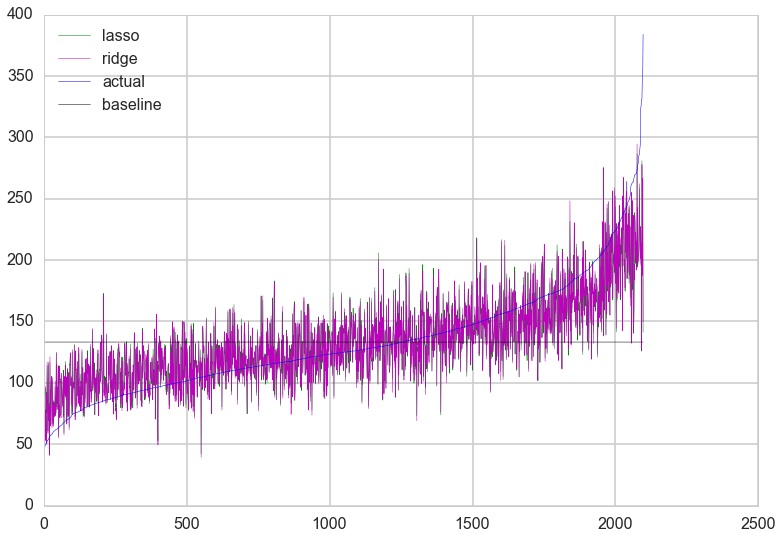

In [128]:
# plot to show difference between baseline, lasso, and ridge regressions
# HOUSE/RENTAL ratio 2015

ratio_2015_preds_df = pd.DataFrame({'baseline':train_ratio_2015_mean,'lasso':lasso_pred_ratio_2015, 'ridge': ridge_pred_ratio_2015,'actual':ratio_2015_test.response})
ratio_2015_preds_df = ratio_2015_preds_df.sort('actual')

m=0
n=2098

plt.plot(ratio_2015_preds_df.lasso[m:n], color='g', linewidth=0.5, label='lasso')
plt.plot(ratio_2015_preds_df.ridge[m:n], color='m', linewidth=0.5, label='ridge')
plt.plot(ratio_2015_preds_df.actual[m:n], color='b', linewidth=0.5, label='actual')
plt.plot(ratio_2015_preds_df.baseline[m:n], color='k', linewidth=0.5, label='baseline')
plt.legend(loc='best')
plt.show()

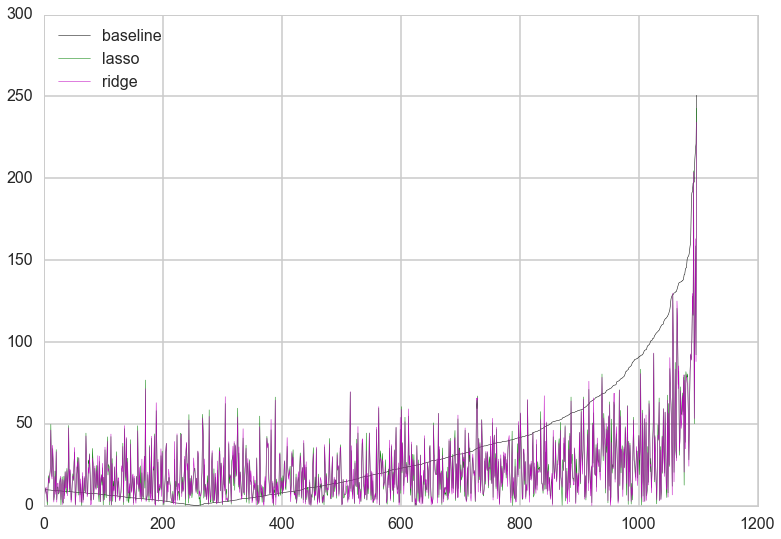

In [126]:
# plt.plot(ratio_2015_preds_df.actual[m:n], color='b', linewidth=0.5, label='actual')
plt.plot(abs(ratio_2015_preds_df.baseline[m:n] - ratio_2015_preds_df.actual[m:n]), color='k', linewidth=0.5, label='baseline')
plt.plot(abs(ratio_2015_preds_df.lasso[m:n] - ratio_2015_preds_df.actual[m:n]), color='g', linewidth=0.5, label='lasso')
plt.plot(abs(ratio_2015_preds_df.ridge[m:n] - ratio_2015_preds_df.actual[m:n]), color='m', linewidth=0.5, label='ridge')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(ratio_2015_preds_df.actual[m:n], color='b', linewidth=0.5, label='actual')
plt.plot(ratio_2015_preds_df.baseline[m:n], color='k', linewidth=0.5, label='baseline')
plt.plot(ratio_2015_preds_df.lasso[m:n], color='g', linewidth=0.5, label='lasso')
plt.plot(ratio_2015_preds_df.ridge[m:n], color='m', linewidth=0.5, label='ridge')
plt.legend(loc='best')
plt.show()

In [113]:
ratio_2015_preds_df.head(4)

,actual,baseline,lasso,ridge
1004,38.362361,133.223276,67.113344,63.128328
1193,47.400434,133.223276,63.270515,63.547341
285,47.734003,133.223276,78.182436,76.285234
877,47.954011,133.223276,90.008024,86.677352


## Linear Regression with Ridge Regularization (normalized and transformed features)

In [85]:
from sklearn.linear_model import RidgeCV

start_time = time.time()
X_train = merged_train_t_best.drop(['zipcode','response'], 1).values
Y_train = merged_train_t_best['response'].values
X_test = merged_test_t_best.drop(['zipcode','response'], 1).values
Y_test = merged_test_t_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
clf_ridge_model = RidgeCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_ridge = clf_ridge_model.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_ridge)

----- 0.0536119937897 seconds to run ----- 
---- best alpha = 0.1 ----


In [86]:
training_accuracy = clf_ridge_model.score(X_train, Y_train)
test_accuracy = clf_ridge_model.score(X_test, Y_test)
print '#### based on the best Linear Regression with Ridge Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)

#### based on the best Linear Regression with Ridge Regularization ####
R-squared on training data: 0.37
R-squared on test data:     0.33


In [87]:
ridge_pred_house = clf_ridge_model.predict(X_test)
ridge_rmse = get_rmse(ridge_pred_house, Y_test)

print 'Response Variable: Housing Delta'
print 'RMSE for Ridge: ' + str(lasso_rmse)

Response Variable: Housing Delta
RMSE for Ridge: 27.09083961


In [88]:
# HOUSE/RENTAL RATIO DELTA RESPONSE
start_time = time.time()

X_train = ratio_delta_train_best.drop(['response','zipcode'], 1).values
Y_train = ratio_delta_train_best['response'].values
X_test = ratio_delta_test_best.drop(['response','zipcode'], 1).values
Y_test = ratio_delta_test_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_model_ratio_delta = RidgeCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_ridge = ridge_model_ratio_delta.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_ridge)

----- 0.0509660243988 seconds to run ----- 
---- best alpha = 10.0 ----


In [89]:
training_accuracy = ridge_model_ratio_delta.score(X_train, Y_train)
test_accuracy = ridge_model_ratio_delta.score(X_test, Y_test)
print '#### based on the best Linear Regression with Ridge Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)

#### based on the best Linear Regression with Ridge Regularization ####
R-squared on training data: 0.28
R-squared on test data:     0.26


In [90]:
ridge_pred_ratio_delta = ridge_model_ratio_delta.predict(X_test)
ridge_rmse = get_rmse(ridge_pred_ratio_delta, Y_test)

print 'Response Variable: Housing/Rental Ratio Delta'
print 'RMSE for Ridge: ' + str(ridge_rmse)

Response Variable: Housing/Rental Ratio Delta
RMSE for Ridge: 0.126692986346


In [91]:
# HOUSE/RENTAL RATIO 2015 RESPONSE
start_time = time.time()

X_train = ratio_2015_train_best.drop(['response','zipcode'], 1).values
Y_train = ratio_2015_train_best['response'].values
X_test = ratio_2015_test_best.drop(['response','zipcode'], 1).values
Y_test = ratio_2015_test_best['response'].values

alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_model_ratio_2015 = RidgeCV(alphas = alphas).fit(X_train, Y_train)
best_alpha_ridge = ridge_model_ratio_2015.alpha_

print '----- %s seconds to run ----- \n---- best alpha = %s ----'%(time.time() - start_time, best_alpha_ridge)

----- 0.0388121604919 seconds to run ----- 
---- best alpha = 1.0 ----


In [92]:
training_accuracy = ridge_model_ratio_2015.score(X_train, Y_train)
test_accuracy = ridge_model_ratio_2015.score(X_test, Y_test)
print '#### based on the best Linear Regression with Ridge Regularization ####'
print "R-squared on training data: %0.2f" % (training_accuracy)
print "R-squared on test data:     %0.2f" % (test_accuracy)

#### based on the best Linear Regression with Ridge Regularization ####
R-squared on training data: 0.64
R-squared on test data:     0.63


In [93]:
ridge_pred_ratio_2015 = ridge_model_ratio_2015.predict(X_test)
ridge_rmse = get_rmse(ridge_pred_ratio_2015, Y_test)

print 'Response Variable: Housing/Rental Ratio 2015'
print 'RMSE for Ridge: ' + str(ridge_rmse)

Response Variable: Housing/Rental Ratio 2015
RMSE for Ridge: 27.0631983355


#svm's

In [ ]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP'].values

Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

#your code here
from sklearn.grid_search import GridSearchCV
import time

start_time = time.time()

n_folds = 5
n_jobs = 4
gs = GridSearchCV(clfsvm, param_grid={"C": Cs}, cv=n_folds, n_jobs=n_jobs)
gs.fit(Xmatrix_train, Yresp_train)

C_best = gs.best_params_['C']
print 'The best c-value is %s'%(C_best)

print '----- %s seconds to run -----'%(time.time() - start_time)

In [ ]:
##### In case we want to do SVM regression/other types of models later

In [ ]:
#calculate the accuracy here
#your code here
start_time = time.time()

best = LinearSVC(C=C_best, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=None, tol=0.0001, verbose=0)
best.fit(Xmatrix_train, Yresp_train)

training_accuracy = best.score(Xmatrix_train, Yresp_train)
test_accuracy = best.score(Xmatrix_test, Yresp_test)
print '#### based on the best LinearSVC ####'
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print '----- %s seconds to run -----'%(time.time() - start_time)